In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', 10)

In [3]:
names = 'date', 'time', 's-ip', 'cs-method', 'cs-uri-stem', 'cs-uri-query', 's-port', 'cs-username', 'c-ip', 'cs(User-Agent)',  'cs(Referer)', 'sc-status', 'sc-substatus',  'sc-win32-status', 'time-taken'
data = pd.read_table("data_anal", sep= " ", date_parser=['date'], skiprows= 1, names= names)
data.head()

,date,time,s-ip,cs-method,cs-uri-stem,cs-uri-query,s-port,cs-username,c-ip,cs(User-Agent),cs(Referer),sc-status,sc-substatus,sc-win32-status,time-taken
0,2022-01-01,06:54:00,192.122.207.96,GET,favico.ico,-,443,-,194.79.48.113,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0,27
1,2022-01-01,06:54:00,192.122.207.96,GET,index.aspx,-,443,-,194.79.48.113,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,-,200,0,0,25
2,2022-01-01,06:54:30,192.122.207.96,GET,kgcfhenv.css,-,443,-,194.79.48.113,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,404,0,0,25
3,2022-01-01,06:54:30,192.122.207.96,GET,favico.ico,-,443,-,194.79.48.113,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,29
4,2022-01-01,06:54:30,192.122.207.96,GET,index.aspx,-,443,-,194.79.48.113,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,https://bankofpunk.local/index.aspx,200,0,0,22


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70783 entries, 0 to 70782
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date             70783 non-null  object
 1   time             70783 non-null  object
 2   s-ip             70783 non-null  object
 3   cs-method        70783 non-null  object
 4   cs-uri-stem      70783 non-null  object
 5   cs-uri-query     70783 non-null  object
 6   s-port           70783 non-null  int64 
 7   cs-username      70783 non-null  object
 8   c-ip             70783 non-null  object
 9   cs(User-Agent)   70783 non-null  object
 10  cs(Referer)      70783 non-null  object
 11  sc-status        70783 non-null  int64 
 12  sc-substatus     70783 non-null  int64 
 13  sc-win32-status  70783 non-null  int64 
 14  time-taken       70783 non-null  int64 
dtypes: int64(5), object(10)
memory usage: 5.4+ MB


In [84]:
data.describe()

,s-port,sc-status,sc-substatus,sc-win32-status,time-taken
count,70783.0,70783.000000,70783.0,70783.0,70783.000000
mean,443.0,226.076614,0.0,0.0,24.997471
std,0.0,62.809214,0.0,0.0,3.160411
min,443.0,200.000000,0.0,0.0,20.000000
25%,443.0,200.000000,0.0,0.0,22.000000
50%,443.0,200.000000,0.0,0.0,25.000000
75%,443.0,200.000000,0.0,0.0,28.000000
max,443.0,404.000000,0.0,0.0,30.000000


<AxesSubplot:>

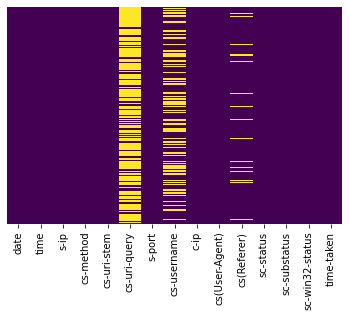

In [3]:
sns.heatmap(data == '-', yticklabels = False, cbar = False, cmap = 'viridis') # yellow lines represent null values


In [4]:
data = data[['date', 'time', 'cs-method', 'cs-uri-stem', 
        'cs-username', 'c-ip', 'cs(User-Agent)', 'cs(Referer)',
       'sc-status', 'time-taken']]

In [5]:
np.unique(data['cs(Referer)'])

array(['-', 'https://bankofpunk.local/account_status.aspx',
       'https://bankofpunk.local/change_avatar.aspx',
       'https://bankofpunk.local/changepassword.aspx',
       'https://bankofpunk.local/faq.aspx',
       'https://bankofpunk.local/index.aspx',
       'https://bankofpunk.local/login.aspx',
       'https://bankofpunk.local/transactions.aspx',
       'https://bankofpunk.local/transfer.aspx',
       'https://bankofpunk.local/transfer_complete.aspx'], dtype=object)

In [6]:
data['cs(Referer)']= data['cs(Referer)'].apply(lambda x: x if x == '-' else x[25:]) # removing the "https://bankofpunk.local/" part

### ----------------> get ips that connects with different usernames

In [7]:
grp_ip_agg_username = data.groupby(by='c-ip', as_index=False).agg({'cs-username': pd.Series.nunique})
ips = grp_ip_agg_username[grp_ip_agg_username['cs-username'] > 2 ]['c-ip']
for ip in ips:
        print(ip, np.unique(data[data['c-ip'] ==  ip]['cs-username']))

193.17.187.213 ['-' 'hf428841' 'xj155119']


#### -----------> tracing 193.17.187.213 

In [13]:
print(
    data[data['c-ip'] == '193.17.187.213']['cs-method'].value_counts(),"\n", 
    data[data['c-ip'] == '193.17.187.213']['sc-status'].value_counts()
)



GET     119
POST      5
Name: cs-method, dtype: int64 
 200    101
404     15
301      8
Name: sc-status, dtype: int64


### ----------------> get usernames that connects with different ips

In [14]:
grp_username_agg_ip = data.groupby(by='cs-username', as_index=False).agg({'c-ip': pd.Series.nunique})
usernames = grp_username_agg_ip[grp_username_agg_ip['c-ip'] > 1]['cs-username']
for username in usernames:
        if username == '-':
                continue
        print(username, np.unique(data[data['cs-username'] == username]['c-ip']))

dn768529 ['194.24.166.67' '217.8.20.27']
lh124581 ['150.127.254.243' '185.157.161.194']
qo263492 ['193.123.206.129' '91.199.151.29']


# second type of sus behaviour

In [15]:
grp_ip_date = data[['c-ip', 'date','cs-method', 'cs(Referer)']].groupby(['c-ip', 'date', 'cs(Referer)']).count()
grp_ip_date.head()

# number of transaction for by ip by day by referer

cs-method
c-ip         date       cs(Referer)                   
101.0.10.106 2022-01-03 -                            4
                        account_status.aspx          3
                        index.aspx                  11
                        login.aspx                   8
                        transactions.aspx           13

<AxesSubplot:>

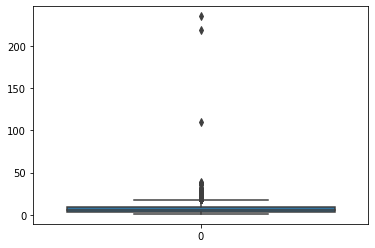

In [16]:
sns.boxplot(data = grp_ip_date['cs-method'].values)
# we see the distribution of our data (mean)
# dectect outliers
# we have extreme values here

In [17]:
grp_ip_date[grp_ip_date['cs-method'] > 50]

,,,cs-method
c-ip,date,cs(Referer),
185.157.161.194,2022-01-28,login.aspx,235
193.123.206.129,2022-01-01,login.aspx,219
194.24.166.67,2022-01-20,login.aspx,110


In [18]:
def get_intruders_ips():
    ips = []
    for row in grp_ip_date[grp_ip_date['cs-method'] > 50].index:
        ips.append(row[0])
    return ips

In [19]:
intruders = pd.DataFrame()
ips = get_intruders_ips()
dict = {}
for ip in ips:
    dict['ip'] = ip
    df = data[data['c-ip'] == ip]
    dict.update(df['cs(Referer)'].value_counts().to_dict())
    dict.update(df['sc-status'].value_counts().to_dict())
    dict.update(df['cs-method'].value_counts().to_dict())
    intruders = intruders.append(dict, ignore_index=True)

intruders

,ip,login.aspx,transfer.aspx,transfer_complete.aspx,transactions.aspx,-,index.aspx,401,200,404,301,POST,GET
0,185.157.161.194,235.0,36.0,20.0,9.0,4.0,1.0,231.0,62.0,9.0,3.0,238.0,67.0
1,193.123.206.129,219.0,39.0,15.0,6.0,2.0,1.0,215.0,61.0,3.0,3.0,222.0,60.0
2,194.24.166.67,110.0,35.0,19.0,11.0,2.0,1.0,106.0,63.0,6.0,3.0,113.0,65.0
